In [2]:
# using DataFrames
# using CSV
include("PVCR.jl");
include("functions/plotting_base_gd.jl")

plot_all_tariffs_per_company (generic function with 1 method)

In [7]:
# Read in all of the utility bills for the various utilities and tariff types
base_GD = CSV.read("data/Base_GD.csv")

# Narrow down to {Residential | Commerical Industrial | Medium Voltage} CNFL customers

all_cnfl = filter(row -> (!ismissing(row.EMPRESA) && row.EMPRESA == "CNFL"), base_GD)

,ANNO,MES,ENERGIA_GENERADA,ENERGIA_DEPOSITADA,ENERGIA_RETIRADA,IMPORTE_POR_ENERGIA_RETIRADA
,Int64,Int64,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,2018,1,209.0,117.0,102.0,2145.0
2,2018,2,235.0,122.0,115.0,2420.0
3,2018,3,305.0,169.0,149.0,3135.0
4,2018,4,355.0,217.0,173.0,3640.0
5,2018,5,338.0,185.0,165.0,3470.0
6,2018,1,432.0,296.0,211.0,4435.0
7,2018,2,482.0,323.0,236.0,4965.0
8,2018,3,614.0,448.0,300.0,6310.0
9,2018,4,710.0,547.0,293.0,6160.0


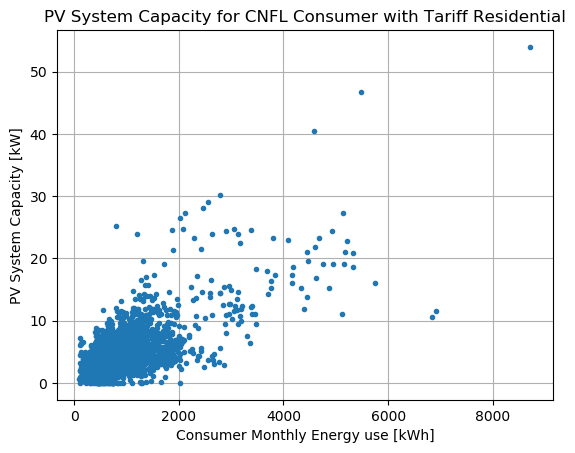

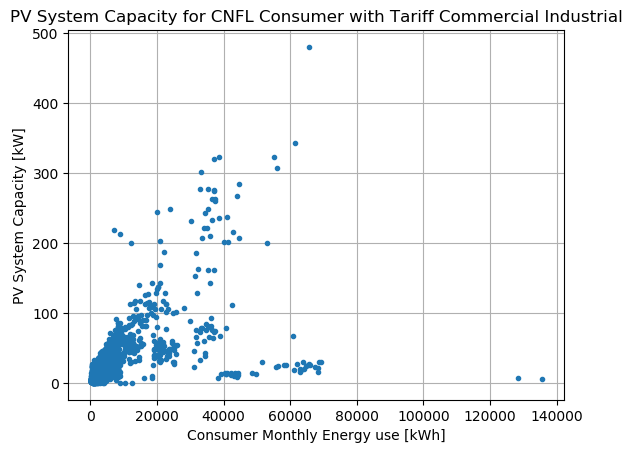

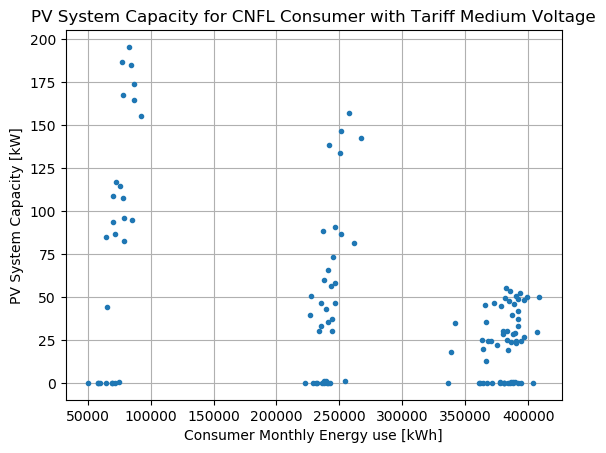

In [6]:
plot_all_tariffs_per_company(all_cnfl, "CNFL")

In [5]:
# Compare this real-world data with the predicted adoption of the economically rational model in Notebook 4

# Residential
res_consumption = 100:100:5000
res_model_predictions = []
for (ix, co) in enumerate(res_consumption)
    cnfl_residential.econsumption = co; get_pmax(cnfl_residential);
    res = optimal_pv(cnfl_residential, PVRes, 0.0:2:50, BAC1, tariff_increase = true)
    push!(res_model_predictions, res[1][2])
end

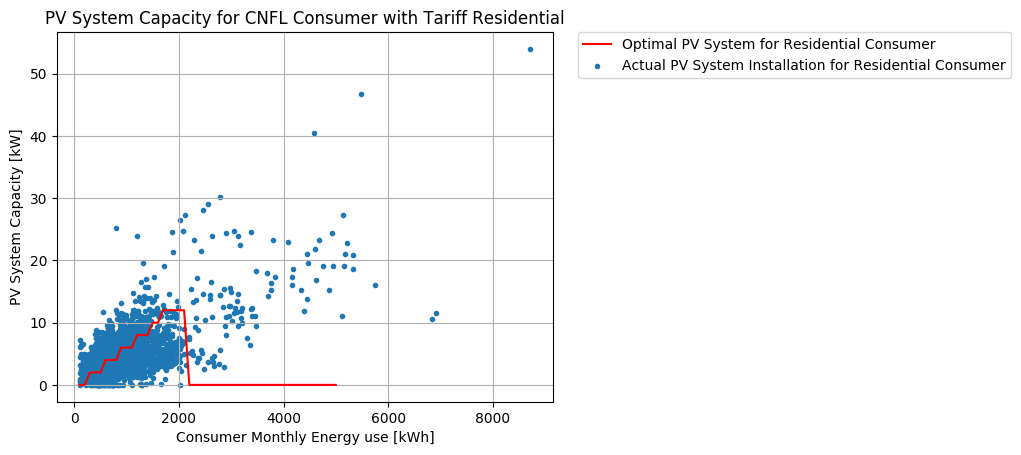

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Residential')

In [8]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Residential", "CNFL", res_consumption, res_model_predictions)

In [9]:
# Commerical Industrial
consumption1 = 100:100:1000
comind_model_predictions = []
for (ix, co) in enumerate(consumption1)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVRes, 0.0:10:100, BAC1, tariff_increase = true)
    push!(comind_model_predictions, res[1][2])
end

consumption2 = 2000:1000:10000
for (ix, co) in enumerate(consumption2)
    cnfl_commercial.econsumption = co; get_pmax(cnfl_commercial);
    res = optimal_pv(cnfl_commercial, PVRes, 0.0:10:200, BAC1, tariff_increase = true)
    push!(comind_model_predictions, res[1][2])
end

consumption3 = 20000:10000:50000
for (ix, co) in enumerate(consumption3)
    cnfl_industrial.econsumption = co; get_pmax(cnfl_industrial);
    res = optimal_pv(cnfl_industrial, PVRes, 0.0:20:300, BAC1, tariff_increase = true)
    push!(comind_model_predictions, res[1][2])
end

comind_consumption = vcat(consumption1, consumption2, consumption3);

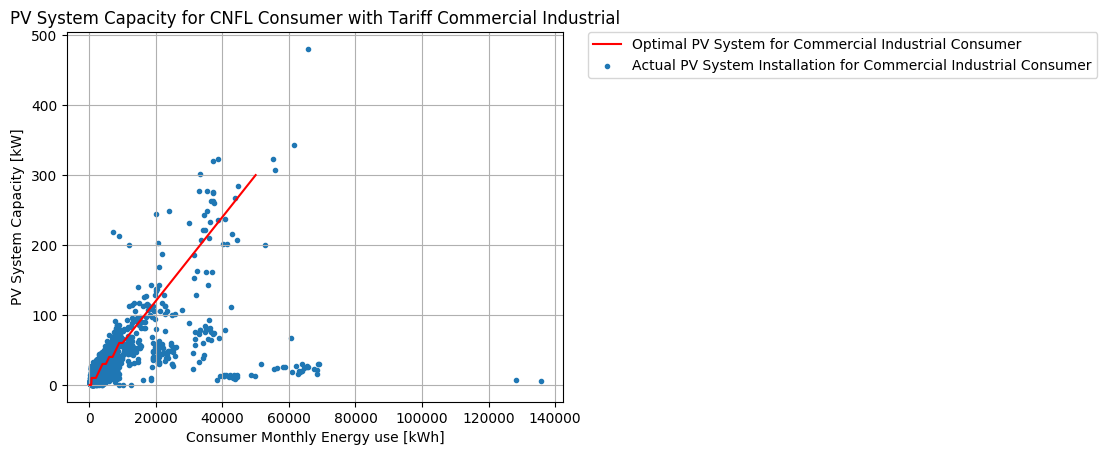

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Commercial Industrial')

In [10]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Commercial Industrial", "CNFL", comind_consumption, comind_model_predictions)

In [11]:
# Medium Voltage
consumption1 = 500:500:10000
tmt_model_predictions = []
for (ix, co) in enumerate(consumption1)
    cnfl_mediumvoltage.econsumption = co; get_pmax(cnfl_mediumvoltage);
    res = optimal_pv(cnfl_mediumvoltage, PVRes, 0.0:50:200, BAC1, tariff_increase = true)
    push!(tmt_model_predictions, res[1][2])
end

consumption2 = 10000:10000:200000
for (ix, co) in enumerate(consumption2)
    cnfl_mediumvoltage.econsumption = co; get_pmax(cnfl_mediumvoltage);
    res = optimal_pv(cnfl_mediumvoltage, PVRes, 0.0:50:200, BAC1, tariff_increase = true)
    push!(tmt_model_predictions, res[1][2])
end

consumption3 = 200000:100000:600000
for (ix, co) in enumerate(consumption3)
    cnfl_mediumvoltage.econsumption = co; get_pmax(cnfl_mediumvoltage);
    res = optimal_pv(cnfl_mediumvoltage, PVRes, 0.0:50:200, BAC1, tariff_increase = true)
    push!(tmt_model_predictions, res[1][2])
end

tmt_consumption = vcat(consumption1, consumption2, consumption3);

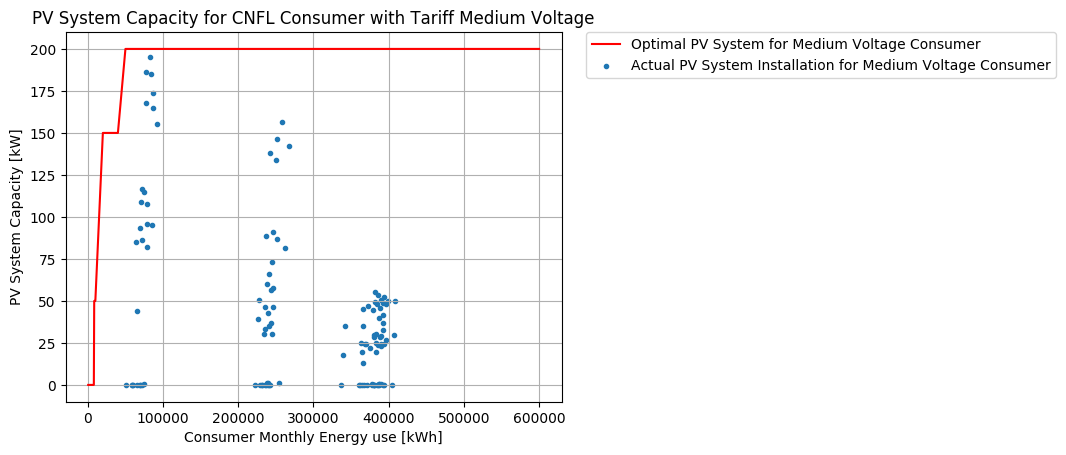

PyObject Text(0.5, 1, 'PV System Capacity for CNFL Consumer with Tariff Medium Voltage')

In [13]:
plot_single_tariff_category_per_company_with_model_prediction(all_cnfl, "Medium Voltage", "CNFL", tmt_consumption, tmt_model_predictions)